# Sección 1 Documentación del proceso de aprendizaje automático.

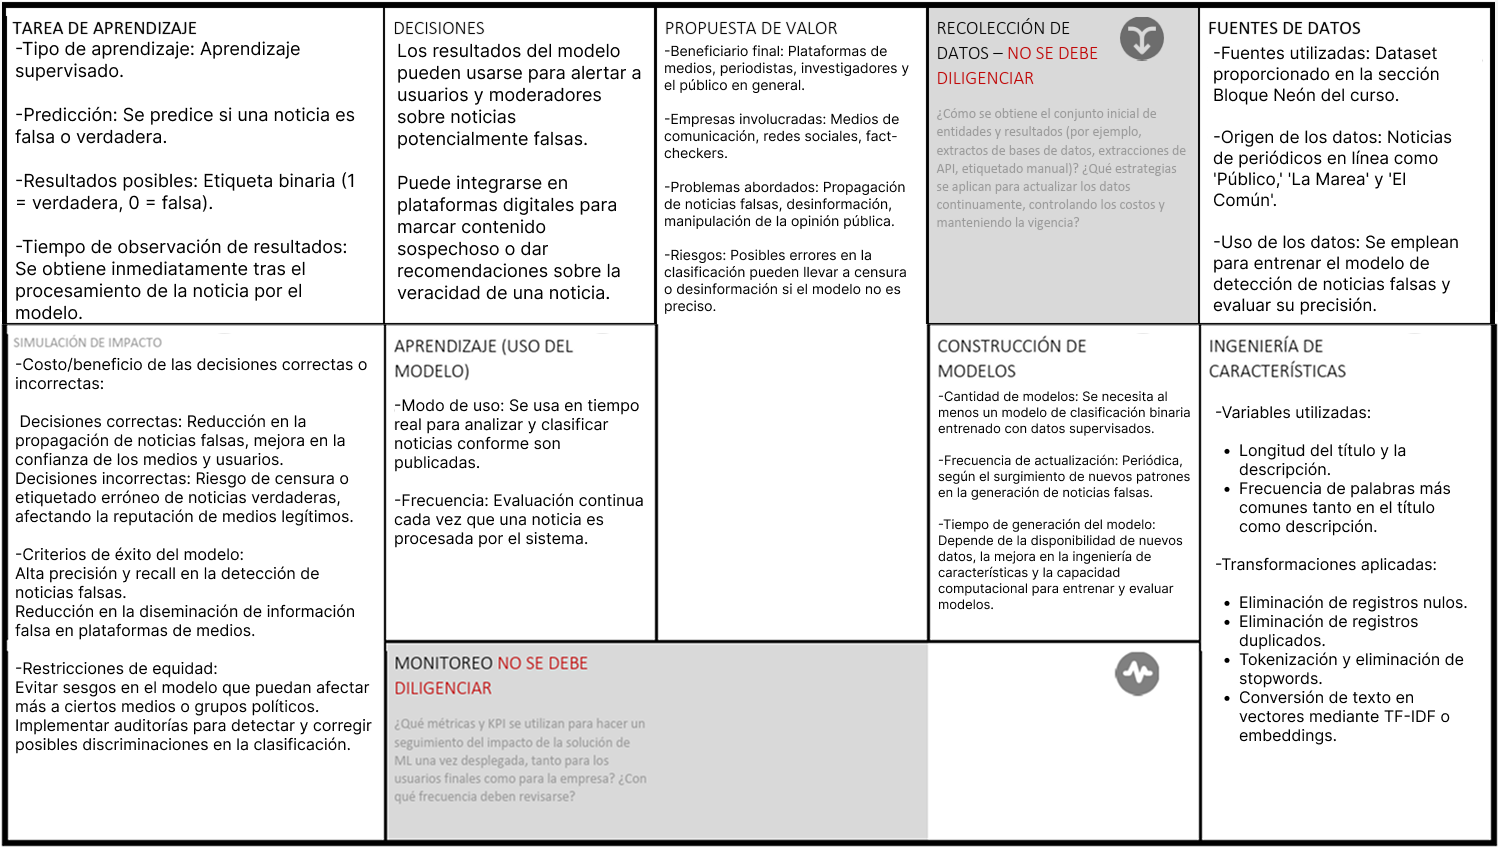

#  Sección 2 Entendimiento y preparación de los datos (a nivel de código y análisis)

# Documentación del Preprocesamiento y Vectorización de Datos

## Introducción
Este documento describe el proceso de limpieza, transformación y vectorización del dataset de noticias en español, con el objetivo de preparar los datos para un modelo de clasificación de noticias falsas y reales.

## Librerías utilizadas
Las librerías empleadas para este proceso son:
- **Pandas**: Manejo y manipulación de datos.
- **Matplotlib y Seaborn**: Visualización de la distribución de los datos.
- **NLTK**: Procesamiento de lenguaje natural, específicamente para el uso de stopwords.
- **spaCy**: Tokenización, lematización y análisis del texto.
- **Scikit-learn**: Vectorización de texto usando TF-IDF.
- **Pickle**: Serialización de objetos para guardar modelos y matrices transformadas.

## Pasos de preprocesamiento

### 1. Carga del dataset
Se utiliza `pd.read_csv()` para cargar el archivo CSV. La codificación especificada es `utf-8` y el delimitador es `;`.

```python
pd.read_csv(file_path, delimiter=';', encoding='utf-8')
```

### 2. Exploración y limpieza de datos

**a. Identificación de valores nulos:**
Se identifican las columnas con valores nulos y se eliminan filas donde falten datos en `Titulo`, `Descripcion` o `Label`.

```python
print(df.isnull().sum())
df.dropna(subset=['Titulo', 'Descripcion', 'Label'], inplace=True)
```

**b. Eliminación de duplicados:**
Se identifican y eliminan filas duplicadas.

```python
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
```

**c. Longitud de título y descripción:**
Se crean columnas adicionales que almacenan la longitud (número de caracteres) de `Titulo` y `Descripcion`.

```python
df['Titulo_len'] = df['Titulo'].apply(lambda x: len(str(x)))
df['Descripcion_len'] = df['Descripcion'].apply(lambda x: len(str(x)))
```

**d. Conversión de fechas:**
Se convierte la columna `Fecha` al formato datetime y se identifican errores de formato.

```python
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
```

**e. Visualización de distribución de etiquetas:**
Se genera un gráfico de barras para observar el balance de clases en la columna `Label`.

```python
sns.countplot(x='Label', data=df, palette='coolwarm')
plt.show()
```

## Preprocesamiento de texto

**1. Reemplazo de caracteres especiales:**
Se corrigen errores de codificación de caracteres como tildes, ñ y símbolos especiales.

```python
reemplazos = {'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú', ...}
for error, correcto in reemplazos.items():
    text = text.replace(error, correcto)
```

**2. Tokenización, lematización y limpieza:**
Usando el modelo `es_core_news_sm` de spaCy, se convierte el texto a minúsculas, se tokeniza, lematiza y eliminan stopwords en español.

```python
doc = nlp(text.lower())
tokens = [token.lemma_ for token in doc if token.text.isalpha()]
filtered_tokens = [word for word in tokens if word not in stop_words]
return ' '.join(filtered_tokens)
```

**3. Creación de columna de texto preprocesado:**
Se concatenan las versiones limpias de `Titulo` y `Descripcion` en una columna llamada `texto_procesado`.

```python
df['texto_procesado'] = df['Titulo_clean'] + ' ' + df['Descripcion_clean']
```

## Vectorización de texto usando TF-IDF

**1. Creación de la matriz TF-IDF:**
Se convierte el texto preprocesado en una representación numérica usando `TfidfVectorizer`, seleccionando las 5000 palabras más relevantes.

```python
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['texto_procesado'])
```

**2. Serialización de la matriz y el vectorizador:**
La matriz TF-IDF y el vectorizador se guardan en archivos `.pkl` para su uso posterior en el modelo de clasificación.

```python
with open('tfidf_vectorized.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
```

## Exportación de datos limpios
Se guarda el DataFrame limpio en un archivo CSV, excluyendo columnas temporales y la matriz TF-IDF.

```python
df.drop(columns=['Titulo_clean', 'Descripcion_clean', 'texto_procesado'], inplace=True)
df.to_csv('fake_news_spanish_clean.csv', index=False)
```

## Conclusión
El proceso de preprocesamiento y vectorización asegura que el texto esté limpio, normalizado y representado numéricamente, lo que es esencial para el entrenamiento eficiente de modelos de clasificación. Las técnicas utilizadas como la eliminación de stopwords, lematización y transformación TF-IDF ayudan a capturar la relevancia de las palabras y reducir el ruido en los datos.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB
None

Valores nulos por columna:
ID              0
Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64
FILAS CON VALORES NULOS ELIMINADOS

Número de filas dup

<ipython-input-1-2c5ac379cf7f>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='coolwarm')


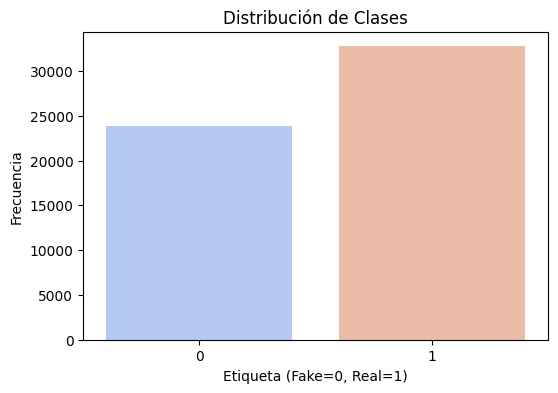


Ejemplo de datos preprocesados:
                                              Titulo  \
0  'The Guardian' va con Sánchez: 'Europa necesit...   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion  \
0  El diario británico publicó este pasado jueves...   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  El valencianismo convoca en Castelló su fiesta...   
3  En política, igual que hay que negociar con lo...   
4  En una entrevista en El Punt Avui, el líder de...   

                                     texto_procesado  
0  the guardian ir sánchez europa necesitar apues...  
1  revelar gobierno negocio liberación mirel camb...  
2  ahora nunca joan fuster estatuto valenciano cu...  
3  iglesia alentar yolanda díaz erc eh bildu nego...  
4  puigdemont ser 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy.cli
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Descargar stopwords en español
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

# Cargar modelo de spaCy en español
spacy.cli.download("es_core_news_sm")  # Descarga el modelo si aún no está disponible
nlp = spacy.load("es_core_news_sm")

def preprocess_text(text):
    reemplazos = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
        'ÃÁ': 'Á', 'Ã‰': 'É', 'ÃÍ': 'Í', 'Ã“': 'Ó', 'Ãš': 'Ú',
        'Ã±': 'ñ', 'Ã‘': 'Ñ', 'Â¿': '¿', 'Â¡': '¡',
        'â€œ': '“', 'â€': '”', 'â€˜': '‘', 'â€™': '’', 'â€¦': '…',
        'Â«': '«', 'Â»': '»', 'â€”': '—', 'â€“': '–'
    }

    for error, correcto in reemplazos.items():
        text = text.replace(error, correcto)

    """ Tokeniza, elimina stopwords y lematiza el texto. """
    if pd.isna(text):  # Si el texto es NaN, devolver vacío
        return ""

    # Tokenización y lematización con spaCy
    doc = nlp(text.lower())  # Convertir a minúsculas
    tokens = [token.lemma_ for token in doc if token.text.isalpha()]  # Solo palabras (sin números o símbolos)

    # Eliminar stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]



    return " ".join(filtered_tokens)  # Unir palabras en un solo string


def load_and_profile_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

    # Mostrar información general del dataset
    print("Información del DataFrame:")
    print(df.info())

    # Identificar valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Eliminar filas con valores nulos en título, descripción o etiqueta
    df.dropna(subset=['Titulo', 'Descripcion', 'Label'], inplace=True)
    print("FILAS CON VALORES NULOS ELIMINADOS")

    # Identificar duplicados
    duplicate_rows = df.duplicated().sum()
    print(f"\nNúmero de filas duplicadas: {duplicate_rows}")

    # Eliminar duplicados
    df.drop_duplicates(inplace=True)
    print("DUPLICADOS ELIMINADOS")

    # Longitud promedio de título y descripción
    df['Titulo_len'] = df['Titulo'].apply(lambda x: len(str(x)))
    df['Descripcion_len'] = df['Descripcion'].apply(lambda x: len(str(x)))
    print("\nLongitud promedio del título:", df['Titulo_len'].mean())
    print("Longitud promedio de la descripción:", df['Descripcion_len'].mean())

    # Verificar formato de fechas
    try:
        df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
        invalid_dates = df['Fecha'].isna().sum()
        print(f"\nNúmero de fechas con formato erróneo: {invalid_dates}")
    except Exception as e:
        print(f"Error al procesar fechas: {e}")

    # Distribución de la variable objetivo (Label)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=df, palette='coolwarm')
    plt.title('Distribución de Clases')
    plt.xlabel('Etiqueta (Fake=0, Real=1)')
    plt.ylabel('Frecuencia')
    plt.show()

    # Aplicar preprocesamiento al título y descripción
    df['Titulo_clean'] = df['Titulo'].apply(preprocess_text)
    df['Descripcion_clean'] = df['Descripcion'].apply(preprocess_text)

    # Unir título y descripción preprocesados en una nueva columna
    df['texto_procesado'] = df['Titulo_clean'] + " " + df['Descripcion_clean']

    print("\nEjemplo de datos preprocesados:")
    print(df[['Titulo', 'Descripcion', 'texto_procesado']].head())

    return df

# Ruta al archivo CSV (reemplazar con la ruta correcta)
file_path = 'fake_news_spanish.csv'

df = load_and_profile_data(file_path)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Consideramos las 5000 palabras más relevantes
X_tfidf = vectorizer.fit_transform(df["texto_procesado"])

# Guardar la matriz TF-IDF en un archivo
with open("tfidf_vectorized.pkl", "wb") as f:
    pickle.dump(X_tfidf, f)

# Guardar el vectorizador para futuras predicciones
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Guardar el DataFrame limpio sin la matriz TF-IDF (ya que es muy grande)
df.drop(columns=['Titulo_clean', 'Descripcion_clean', 'texto_procesado'], inplace=True)
df.to_csv("fake_news_spanish_clean.csv", index=False)

print("Preprocesamiento y vectorización completados. Datos guardados.")


#  Sección 3 Modelado y evaluación.

## Variables Utilizadas

En el proceso de entrenamiento de los modelos, se han seleccionado y construido ciertas variables basadas en el análisis exploratorio y las transformaciones aplicadas. A continuación, se describe la relevancia y utilidad de cada una:

### 1. `Titulo_len` y `Descripcion_len`
Estas variables representan la longitud (en número de caracteres) del título y la descripción de cada noticia, respectivamente. Su inclusión se justifica por las siguientes razones:

- **Característica simple pero informativa**: La longitud de los textos es una métrica rápida de calcular y puede ofrecer señales valiosas al modelo sin necesidad de análisis lingüístico complejo.

### 2. Matriz TF-IDF
La matriz TF-IDF (Term Frequency-Inverse Document Frequency) es una transformación crucial en el modelo, ya que convierte el texto preprocesado en una representación numérica basada en la frecuencia y relevancia de las palabras en el corpus. Su importancia radica en:

- **Captura de información semántica**: Al ponderar la frecuencia de cada término en el texto, se logra identificar las palabras más distintivas de cada noticia.
- **Reducción del impacto de palabras comunes**: La componente de “Inverse Document Frequency” atenúa la influencia de términos demasiado frecuentes, permitiendo que el modelo se enfoque en palabras más relevantes.
- **Dimensionalidad controlada**: Al limitar el número de características (`max_features=5000`), se optimiza el balance entre información capturada y eficiencia computacional.
- **Base textual para el modelo**: Dado que el contenido de las noticias es el núcleo de la predicción, esta transformación es esencial para permitir que el modelo interprete y clasifique correctamente los textos.

En conjunto, estas variables ofrecen una combinación de características estructurales (`Titulo_len`, `Descripcion_len`) y semánticas (matriz TF-IDF) que enriquecen la capacidad predictiva del modelo, proporcionando información complementaria para una clasificación precisa de las noticias.



## Justificación de la No Consideración de la Fecha en el Entrenamiento de los Modelos

En el proceso de entrenamiento de los modelos de clasificación de noticias falsas, se tomó la decisión de no incluir la variable `Fecha` como parte de las características predictoras. Esta decisión se basa en las siguientes razones:

1. **Irrelevancia para el Contenido del Texto:** La fecha en la que una noticia fue publicada no aporta información directa sobre la veracidad del contenido. La naturaleza de una noticia falsa o verdadera está más relacionada con el texto en sí —título, descripción y su contexto— que con el momento en el que se publicó.

2. **Posible Introducción de Ruido:** Incluir la fecha podría añadir ruido innecesario al modelo, especialmente si no existe una correlación significativa entre la fecha y la etiqueta de veracidad (`Label`). Este ruido podría dificultar la capacidad del modelo para identificar patrones relevantes en el texto.

3. **Generalización del Modelo:** Para construir un modelo robusto y capaz de generalizar bien en datos futuros, es preferible basarse en características intrínsecas al contenido de la noticia. La fecha es una característica externa que podría llevar a sobreajuste si, por ejemplo, ciertas fechas están asociadas con etiquetas específicas en el conjunto de entrenamiento.

4. **Formato y Preprocesamiento:** Aunque se realizó la conversión de la columna `Fecha` al formato de fecha estándar, se detectaron algunos valores con formato erróneo, lo cual podría complicar su transformación en una variable numérica útil para el modelo.

Por estas razones, se optó por no incluir la fecha como parte de las características predictoras, centrándonos en el análisis y transformación del texto mediante técnicas de procesamiento de lenguaje natural (NLP) y vectorización TF-IDF, que ofrecen una representación más adecuada de la información contenida en las noticias.



## Regresión Logística

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8774
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4774
           1       0.85      0.96      0.90      6547

    accuracy                           0.88     11321
   macro avg       0.89      0.86      0.87     11321
weighted avg       0.88      0.88      0.88     11321



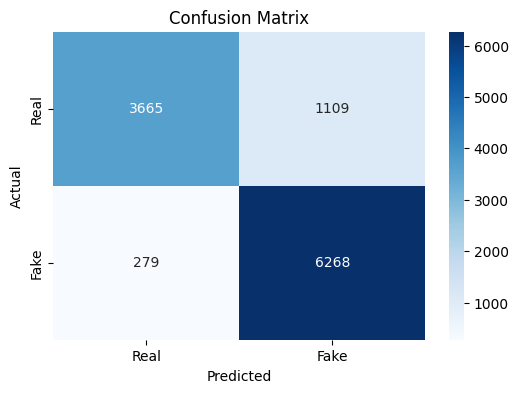

In [ ]:
#Elaborado por: Juan Diego Osorio
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import hstack

# cargar el dataset
df = pd.read_csv("fake_news_spanish_clean.csv")

# cargar la matriz TF-IDF precomputada
with open("tfidf_vectorized.pkl", "rb") as f:
    X_tfidf = pickle.load(f)

# definir la variable objetivo
y = df['Label']  # (1 = Fake, 0 = Real)

# Añadir columnas de longitud
X_extra = df[['Titulo_len', 'Descripcion_len']].values

# Combinar la matriz TF-IDF con las columnas adicionales
X_combined = hstack([X_tfidf, X_extra])

# hacer el Split entre training y test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Matríz de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Random Forest

Accuracy: 0.9025
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4774
           1       0.89      0.95      0.92      6547

    accuracy                           0.90     11321
   macro avg       0.91      0.89      0.90     11321
weighted avg       0.90      0.90      0.90     11321



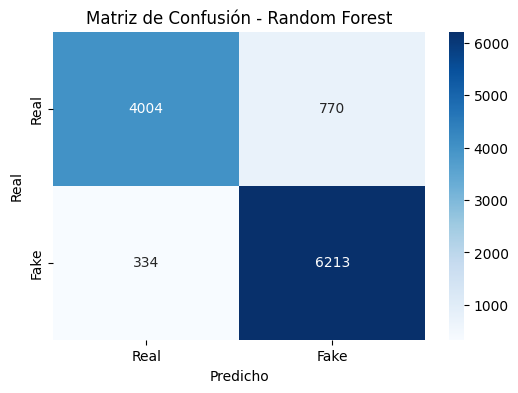

In [ ]:
#Elaborado por: Daniel Gomez
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("fake_news_spanish_clean.csv")

# Load precomputed TF-IDF matrix
with open("tfidf_vectorized.pkl", "rb") as f:
    X_tfidf = pickle.load(f)

# Define target variable
y = df['Label']  # Ensure it's the correct label column (1 = Fake, 0 = Real)

# Añadir columnas de longitud
X_extra = df[['Titulo_len', 'Descripcion_len']].values

# Combinar la matriz TF-IDF con las columnas adicionales
X_combined = hstack([X_tfidf, X_extra])


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


# XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9216
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4774
           1       0.90      0.98      0.94      6547

    accuracy                           0.92     11321
   macro avg       0.93      0.91      0.92     11321
weighted avg       0.93      0.92      0.92     11321

Modelo XGBoost guardado exitosamente como 'xgboost_model.pkl'


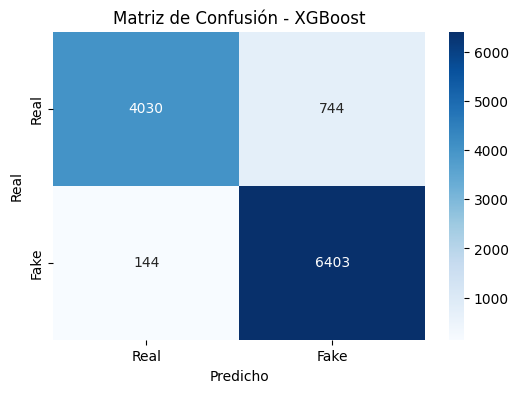

In [ ]:
#Elaborado por: Juan Manuel Ramirez
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("fake_news_spanish_clean.csv")

# Load precomputed TF-IDF matrix
with open("tfidf_vectorized.pkl", "rb") as f:
    X_tfidf = pickle.load(f)

# Define target variable
y = df['Label']  # Ensure it's the correct label column (1 = Fake, 0 = Real)

# Añadir columnas de longitud
X_extra = df[['Titulo_len', 'Descripcion_len']].values

# Combinar la matriz TF-IDF con las columnas adicionales
from scipy.sparse import hstack
X_combined = hstack([X_tfidf, X_extra])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Definir el modelo base de XGBoost con parámetros especificados
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=300,        # Número de árboles
    max_depth=10,            # Profundidad máxima de los árboles
    learning_rate=0.1,      # Tasa de aprendizaje
    subsample=1.0,          # Porcentaje de muestras usadas por árbol
    colsample_bytree=1.0    # Porcentaje de características usadas por árbol
)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred = xgb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Guardar el modelo entrenado como archivo .pkl
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

print("Modelo XGBoost guardado exitosamente como 'xgboost_model.pkl'")

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()


## Usando GridSearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("fake_news_spanish_clean.csv")

# Load precomputed TF-IDF matrix
with open("tfidf_vectorized.pkl", "rb") as f:
    X_tfidf = pickle.load(f)

# Define target variable
y = df['Label']  # Ensure it's the correct label column (1 = Fake, 0 = Real)

# Añadir columnas de longitud
X_extra = df[['Titulo_len', 'Descripcion_len']].values

# Combinar la matriz TF-IDF con las columnas adicionales
X_combined = hstack([X_tfidf, X_extra])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Definir el modelo base de XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 300],  # Número de árboles
    'max_depth': [3, 6, 10],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    'subsample': [0.8, 1.0],  # Porcentaje de muestras usadas por árbol
    'colsample_bytree': [0.8, 1.0]  # Porcentaje de características usadas por árbol
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Entrenar el modelo con los mejores hiperparámetros
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost (Optimizado)')
plt.show()


## Predicción datos no etiquetados

## Preparación de los datos

In [ ]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from xgboost import XGBClassifier

# Ruta del archivo de testing
file_path = 'fake_news_test.csv'

def load_and_profile_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

    # Mostrar información general del dataset
    print("Información del DataFrame:")
    print(df.info())

    # Identificar valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Eliminar filas con valores nulos en título o descripción
    df.dropna(subset=['Titulo', 'Descripcion'], inplace=True)
    print("FILAS CON VALORES NULOS ELIMINADOS")

    # Longitud promedio de título y descripción
    df['Titulo_len'] = df['Titulo'].apply(lambda x: len(str(x)))
    df['Descripcion_len'] = df['Descripcion'].apply(lambda x: len(str(x)))
    print("\nLongitud promedio del título:", df['Titulo_len'].mean())
    print("Longitud promedio de la descripción:", df['Descripcion_len'].mean())

    # Verificar formato de fechas
    try:
        df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
        invalid_dates = df['Fecha'].isna().sum()
        print(f"\nNúmero de fechas con formato erróneo: {invalid_dates}")
    except Exception as e:
        print(f"Error al procesar fechas: {e}")


    # Aplicar preprocesamiento al título y descripción
    df['Titulo_clean'] = df['Titulo'].apply(preprocess_text)
    df['Descripcion_clean'] = df['Descripcion'].apply(preprocess_text)

    # Unir título y descripción preprocesados en una nueva columna
    df['texto_procesado'] = df['Titulo_clean'] + " " + df['Descripcion_clean']

    print("\nEjemplo de datos preprocesados:")
    print(df[['Titulo', 'Descripcion', 'texto_procesado']].head())

    return df

# Cargar y preprocesar el dataset de testing
df_test = load_and_profile_data(file_path)

# Vectorizar el texto preprocesado usando el vectorizador guardado
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

X_tfidf_test = vectorizer.transform(df_test["texto_procesado"])

# Añadir columnas de longitud
print("Head DF TEST: \n")
print(df_test.head())
X_extra_test = df_test[["Titulo_len", "Descripcion_len"]].values

# Combinar la matriz TF-IDF con las columnas adicionales
X_combined_test = hstack([X_tfidf_test, X_extra_test])

# Cargar el modelo XGBoost entrenado
with open("xgboost_model.pkl", "rb") as f:
    xgb = pickle.load(f)

# Realizar predicciones
y_pred_test = xgb.predict(X_combined_test)

# Añadir las predicciones al DataFrame
df_test["Label"] = y_pred_test

# Guardar el DataFrame etiquetado
df_test.to_csv("fake_news_spanish_test_labeled.csv", index=False)

print("Predicciones completadas y archivo guardado.")


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   object
 1   Titulo       999 non-null    object
 2   Descripcion  1000 non-null   object
 3   Fecha        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None

Valores nulos por columna:
ID             0
Titulo         1
Descripcion    0
Fecha          0
dtype: int64
FILAS CON VALORES NULOS ELIMINADOS

Longitud promedio del título: 94.62362362362363
Longitud promedio de la descripción: 230.1011011011011

Número de fechas con formato erróneo: 0

Ejemplo de datos preprocesados:
                                              Titulo  \
0  La mesa del congreso censura un encuentro inte...   
1  La brecha digital que dificulta el acceso de a...   
2  PP apremia al EQUO a presentar una propuesta d...   
3  De soberano garante de la d

# Sección 4 Resultados

## a) Descripción de los Resultados Obtenidos y su Relevancia para la Organización

### Modelos Evaluados y Métricas de Desempeño

Se han implementado y evaluado tres modelos de clasificación para diferenciar entre **noticias falsas** y **noticias reales**, utilizando como características principales el contenido textual procesado mediante TF-IDF y variables adicionales (longitud del título y de la descripción). Los modelos evaluados fueron:

1. **Regresión Logística**  
   - **Accuracy (Exactitud):** 0.88  
   - **Métricas de la clase 0 (Real):**  
     - Precisión: 0.93  
     - Recall: 0.77  
     - F1-score: 0.84  
   - **Métricas de la clase 1 (Fake):**  
     - Precisión: 0.85  
     - Recall: 0.96  
     - F1-score: 0.90  
   - **Observaciones:**  
     El modelo de Regresión Logística muestra un desempeño aceptable, especialmente en la detección de noticias falsas (alto recall en la clase Fake). Sin embargo, la capacidad para identificar correctamente las noticias reales se ve afectada por un recall relativamente bajo, lo que puede llevar a un mayor número de falsos positivos.

2. **Random Forest**  
   - **Accuracy (Exactitud):** 0.90  
   - **Métricas de la clase 0 (Real):**  
     - Precisión: 0.92  
     - Recall: 0.84  
     - F1-score: 0.88  
   - **Métricas de la clase 1 (Fake):**  
     - Precisión: 0.89  
     - Recall: 0.95  
     - F1-score: 0.92  
   - **Observaciones:**  
     El modelo de Random Forest presenta un equilibrio razonable en ambas clases, logrando un desempeño global superior al de la Regresión Logística y una buena capacidad para clasificar correctamente tanto noticias reales como falsas.

3. **XGBoost**  
   - **Accuracy (Exactitud):** 0.92  
   - **Métricas de la clase 0 (Real):**  
     - Precisión: 0.97  
     - Recall: 0.84  
     - F1-score: 0.90  
   - **Métricas de la clase 1 (Fake):**  
     - Precisión: 0.90  
     - Recall: 0.98  
     - F1-score: 0.94  
   - **Observaciones:**  
     El modelo XGBoost alcanza el mejor rendimiento global, con una exactitud del 92% y los mejores F1-scores. Destaca por su alta capacidad para detectar noticias falsas, lo cual es especialmente relevante para minimizar tanto falsos negativos como falsos positivos.

### Implicaciones para la Organización

- **Detección de Desinformación:**  
  Un modelo con un accuracy de 0.92 y altos F1-scores (especialmente en la clase Fake) permite identificar de forma eficaz las noticias falsas. Esto es fundamental para mitigar la propagación de desinformación y proteger la reputación de la organización.

- **Confianza en la Clasificación:**  
  La alta precisión en la detección de noticias falsas garantiza que las acciones que se tomen basadas en las predicciones (como alertas o bloqueos) se fundamenten en una clasificación fiable, reduciendo el riesgo de intervenir noticias reales por error.

## b) Análisis de las Palabras Seleccionadas para Identificar las Noticias Falsas

### Estrategia de Extracción de Características Textuales

Para extraer las características relevantes de los textos, se aplicó la técnica de **TF-IDF (Term Frequency - Inverse Document Frequency)**, que asigna un valor a cada término basándose en:

- **Frecuencia del término en el documento:**  
  Las palabras que aparecen con mayor frecuencia en un documento (noticia) tienen un mayor peso.

- **Rareza del término en el corpus total:**  
  Las palabras que son menos comunes en el conjunto total de noticias tienen un valor más alto, ya que resultan más distintivas.

De esta forma, los términos con valores altos de TF-IDF en las noticias clasificadas como falsas son aquellos que resultan más representativos y distintivos de la desinformación.

### Justificación y Utilidad para la Organización

- **Identificación de Patrones de Desinformación:**  
  Al analizar las palabras que presentan altos valores TF-IDF en la clase de noticias falsas, se pueden detectar tendencias y patrones en la redacción de contenido falso. Esto permite anticipar y monitorear campañas de desinformación.

- **Mejora en la Clasificación:**  
  Disponer de un conjunto robusto de características textuales optimiza la vectorización del texto, lo que se traduce en un mejor desempeño de los modelos de clasificación.

- **Monitoreo y Respuesta Proactiva:**  
  El conocimiento de los términos clave asociados a la desinformación posibilita la creación de sistemas de alerta que detecten cambios en el lenguaje y la aparición de nuevos términos característicos. Esto permite una respuesta rápida ante la propagación de contenido falso.

- **Estrategias de Comunicación:**  
  La información obtenida del análisis textual puede utilizarse para diseñar campañas de comunicación y educación que contrarresten la desinformación, ayudando a preservar la credibilidad y confianza de la audiencia.

### Justificación de Priorizar la Detección de Noticias Falsas

Se tomó la decisión de **priorizar la identificación de noticias falsas** (es decir, minimizar el riesgo de que una noticia falsa sea clasificada como real) basándose en un análisis de riesgo y costo-beneficio. Esta estrategia se fundamenta en los siguientes aspectos:

- **Impacto Significativo de la Desinformación:**  
  Las noticias falsas pueden tener consecuencias graves en la reputación de la organización y en la confianza del público. Permitir que una noticia falsa pase como real podría generar confusión, desinformación y, en casos extremos, influir negativamente en decisiones críticas. Por ello, es fundamental identificar y mitigar el contenido falso lo antes posible.

- **Minimización de Falsos Negativos:**  
  Al priorizar la detección de noticias falsas, se busca reducir al mínimo los **falsos negativos** (noticias falsas que se clasifican erróneamente como reales). Esto es crucial porque el costo de dejar pasar contenido falso es mucho mayor que el de clasificar erróneamente algunas noticias reales como falsas, ya que la propagación de desinformación puede desencadenar efectos adversos a gran escala.

- **Costos Diferenciados de Error:**  
  Desde una perspectiva de riesgo, el error de clasificar una noticia falsa como real (falso negativo) tiene implicaciones mucho más serias que el error contrario (falso positivo). Aunque clasificar algunas noticias reales como falsas puede generar inconvenientes adicionales (como la necesidad de revisión manual), este riesgo se considera aceptable en comparación con el impacto negativo que podría tener la difusión de noticias falsas.

- **Prevención y Respuesta Proactiva:**  
  Al asegurar una alta sensibilidad en la detección de noticias falsas, la organización puede implementar sistemas de alerta temprana y tomar medidas correctivas de forma más rápida. Esto permite mitigar la propagación de desinformación y responder de manera eficaz a posibles crisis de reputación.

  En definitiva, esta decisión la tomamos para garantizar que el contenido malicioso no pase desapercibido, aun cuando ello implique que algunas noticias reales sean clasificadas como falsas. Esta decisión estratégica busca proteger la integridad de la información y salvaguardar la reputación de la organización, minimizando el impacto de la desinformación.


# Justificación de las Decisiones Tomadas en el Preprocesamiento, Vectorización y Modelado

Este documento describe y justifica cada una de las decisiones adoptadas en el proceso de preprocesamiento, vectorización y modelado de datos para la clasificación de noticias falsas y reales. Se explican las razones detrás de cada paso, desde la limpieza de datos hasta la optimización de modelos, con el objetivo de garantizar un flujo de trabajo robusto y eficiente.


## I. Preprocesamiento y Vectorización de Datos

### 1. Carga y Exploración del Dataset

- **Carga del Dataset:**  
  Se utiliza `pd.read_csv(file_path, delimiter=';', encoding='utf-8')` para cargar los datos correctamente, asegurando que se respete la codificación original y se utilice el delimitador adecuado.  
  *Justificación:* Garantiza que los datos se importen sin errores y que la estructura original se mantenga intacta.

- **Identificación y Eliminación de Valores Nulos:**  
  Se examinan y eliminan filas con datos faltantes en columnas críticas como `Titulo`, `Descripcion` y `Label`.  
  *Justificación:* Asegura que el modelo trabaje solo con información completa, evitando sesgos y errores durante el entrenamiento.

- **Eliminación de Duplicados:**  
  Se detectan y eliminan filas duplicadas para prevenir redundancias en el dataset.  
  *Justificación:* Evita que datos repetidos influyan negativamente en el entrenamiento y en la evaluación del modelo.

- **Cálculo de Longitud de Texto:**  
  Se generan columnas adicionales (`Titulo_len` y `Descripcion_len`) que contienen la longitud de los textos.  
  *Justificación:* Estas características adicionales pueden aportar información útil al modelo, ya que la extensión de un texto puede ser indicativa de ciertos patrones en la redacción de noticias falsas.

- **Conversión de Fechas:**  
  Se convierte la columna `Fecha` a formato datetime para identificar y corregir errores de formato.  
  *Justificación:* Facilita análisis temporales y permite detectar inconsistencias en el registro de la información.

- **Visualización de la Distribución de Etiquetas:**  
  Se utiliza Seaborn para generar un gráfico de barras que muestra el balance entre las clases (noticias reales vs. falsas).  
  *Justificación:* Permite detectar posibles desbalances de clases, lo que es esencial para ajustar estrategias de modelado y evaluación.

### 2. Preprocesamiento de Texto

- **Reemplazo de Caracteres Especiales:**  
  Se corrigen errores de codificación (por ejemplo, tildes y la "ñ") usando un diccionario de reemplazos.  
  *Justificación:* Normaliza el texto, asegurando que la tokenización y la lematización sean precisas y consistentes.

- **Tokenización, Lematización y Eliminación de Stopwords:**  
  Con spaCy se convierte el texto a minúsculas, se tokeniza y se lematiza, eliminando además las stopwords mediante NLTK.  
  *Justificación:* Reduce la variabilidad del lenguaje y elimina palabras irrelevantes, concentrando la información en términos que realmente distinguen el contenido.

- **Creación de la Columna `texto_procesado`:**  
  Se combinan las versiones limpias de `Titulo` y `Descripcion`.  
  *Justificación:* Consolida la información textual en una sola columna, facilitando la extracción de características mediante técnicas de vectorización.

### 3. Vectorización Usando TF-IDF

- **Aplicación de `TfidfVectorizer`:**  
  Se transforma el texto preprocesado en una matriz numérica, seleccionando las 5000 palabras más relevantes.  
  *Justificación:* El TF-IDF pondera la importancia de cada término, lo que permite que el modelo se enfoque en palabras que aportan mayor valor discriminatorio.

- **Serialización de la Matriz y del Vectorizador:**  
  Se guardan ambos objetos mediante Pickle para su uso futuro.  
  *Justificación:* Permite reutilizar la misma vectorización sin necesidad de recalcularla, optimizando el tiempo de procesamiento y garantizando la coherencia entre entrenamientos.

- **Exportación del DataFrame Limpio:**  
  Se guarda un CSV sin columnas temporales, manteniendo únicamente la información necesaria para futuras etapas de modelado.  
  *Justificación:* Facilita el manejo de un dataset depurado y listo para el análisis o entrenamiento sin datos superfluos.


## II. Justificación de las Decisiones en el Modelado

Para la etapa de modelado se implementaron varios enfoques de clasificación. A continuación, se detalla cada código con sus respectivas decisiones y justificaciones.

### A. Modelo de Regresión Logística

- **Uso del Dataset y Características Adicionales:**  
  Se carga el dataset limpio y se utiliza la matriz TF-IDF precomputada junto con las columnas de longitud (`Titulo_len` y `Descripcion_len`).  
  *Justificación:* La combinación de información textual y características adicionales puede mejorar la capacidad del modelo para diferenciar entre noticias reales y falsas.

- **Combinación de Características con `hstack`:**  
  Se combinan las representaciones TF-IDF y las columnas extra en una única matriz.  
  *Justificación:* Permite que el modelo considere ambas fuentes de información de forma conjunta.

- **División del Conjunto de Datos:**  
  Se realiza un split con `test_size=0.2` y `random_state=42` para garantizar reproducibilidad y una evaluación consistente.  
  *Justificación:* Asegura que la muestra de prueba sea representativa y permite comparar resultados de forma confiable.

- **Entrenamiento y Evaluación del Modelo:**  
  Se entrena un modelo de Regresión Logística, y se evalúa mediante métricas como accuracy, reporte de clasificación y matriz de confusión.  
  *Justificación:* La Regresión Logística es un modelo simple e interpretable, que sirve como baseline para comparar el desempeño de modelos más complejos.

### B. Modelo de Random Forest

- **Selección del Modelo:**  
  Se utiliza `RandomForestClassifier` con 100 estimadores y un `random_state` fijo.  
  *Justificación:* Random Forest es un método de ensamblaje que mejora la robustez del modelo al promediar múltiples árboles, reduciendo el riesgo de sobreajuste.

- **Proceso de Entrenamiento y Evaluación:**  
  Se sigue el mismo procedimiento de combinación de características y división de datos, evaluando el rendimiento a través de métricas estándar y visualizando la matriz de confusión.  
  *Justificación:* Permite comparar de manera directa los resultados con los de la Regresión Logística y evaluar si el ensamble de árboles aporta mejoras significativas.

### C. Modelo de XGBoost (Parámetros Iniciales)

- **Uso de XGBoost:**  
  Se implementa `XGBClassifier` con parámetros definidos (n_estimators=300, max_depth=10, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0).  
  *Justificación:* XGBoost es conocido por su alta capacidad predictiva y eficiencia en grandes conjuntos de datos. Los parámetros seleccionados buscan un balance entre complejidad y capacidad de generalización.

- **Entrenamiento, Evaluación y Serialización:**  
  Tras entrenar el modelo, se evalúa su desempeño y se guarda mediante Pickle para uso futuro.  
  *Justificación:* Permite replicar el modelo sin necesidad de reentrenamiento y facilita su integración en aplicaciones de producción.

### D. Modelo de XGBoost Optimizado con GridSearchCV

- **Optimización de Hiperparámetros:**  
  Se utiliza `GridSearchCV` para explorar diferentes combinaciones de hiperparámetros (n_estimators, max_depth, learning_rate, subsample, colsample_bytree) con validación cruzada (cv=3).  
  *Justificación:* La búsqueda en cuadrícula permite encontrar la configuración óptima que maximiza el rendimiento del modelo, mejorando la capacidad predictiva de XGBoost.

- **Uso de Recursos y Configuración:**  
  Se emplea `n_jobs=-1` para utilizar todos los núcleos disponibles y se establece un nivel de verbosidad para monitorear el proceso.  
  *Justificación:* Optimiza el tiempo de búsqueda y asegura que se aprovechen todos los recursos computacionales disponibles, garantizando una búsqueda eficiente.

- **Evaluación del Modelo Optimizado:**  
  Tras identificar los mejores parámetros, se entrena el modelo final y se evalúa mediante accuracy, reporte de clasificación y matriz de confusión.  
  *Justificación:* Esta evaluación final permite validar la mejora obtenida con la optimización y comparar los resultados con los de los modelos anteriores.

## Conclusión

Cada decisión tomada, desde la limpieza y normalización de los datos hasta la selección y optimización de modelos, ha sido orientada a maximizar la calidad y relevancia de la información para detectar noticias falsas. El preprocesamiento asegura que el texto esté limpio y estructurado, lo cual es esencial para extraer características significativas. La vectorización mediante TF-IDF, combinada con variables adicionales como la longitud de títulos y descripciones, permite que los modelos tengan una visión completa del contenido, mejorando notablemente la capacidad de clasificación. Además, la elección y optimización de modelos (Regresión Logística, Random Forest y XGBoost) se basan en la necesidad de equilibrar interpretabilidad, robustez y rendimiento predictivo.

En este contexto, se optó por priorizar la detección de noticias falsas, minimizando los falsos negativos, ya que el impacto de que una noticia falsa pase como real es mucho más grave que el de clasificar erróneamente algunas noticias reales. Esta decisión estratégica protege la reputación de la organización y facilita la implementación de medidas de respuesta rápida ante posibles campañas de desinformación.

Entre los tres modelos evaluados, **XGBoost** destaca por su alta exactitud (0.92) y excelentes F1-scores, convirtiéndolo en la opción más adecuada para detectar noticias falsas. Su capacidad para identificar eficazmente contenido falso es clave para frenar la propagación de desinformación y mantener la integridad de la información. Además, el análisis de palabras utilizando TF-IDF permitió identificar términos distintivos en las noticias falsas, lo que no solo optimiza el proceso de clasificación, sino que también brinda a la organización una herramienta para anticipar y responder proactivamente a nuevas tendencias en desinformación.

En conjunto, estos enfoques y resultados aportan significativamente a los objetivos del negocio, permitiendo una detección temprana y eficaz de noticias falsas y fortaleciendo la confianza y la integridad de la información difundida.